<a href="https://colab.research.google.com/github/nonoumasy/Deep-Learning-on-Tips-dataset/blob/master/Deep_Learning_on_Tips_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
tips_df = sns.load_dataset('tips')

#Classification

Classifying 'sex' of patron based on the following features: 'total_bill', 'tip', 'smoker', 'day', 'time', 'size'

In [0]:
# assign dataset to feature and target variables
X = tips_df.drop(['sex'], axis=1)
y = to_categorical(pd.Categorical(tips_df.sex).codes)


In [0]:
# preprocessing for classification
col_trans = make_column_transformer((OneHotEncoder(), ['time', 'smoker', 'day']), remainder ='passthrough')

# not sure if we need to scale the dataset. I used keras BatchNormalization but found scaling the data got a better score.
ss = StandardScaler() 

# preprocessing pipeline
pipe = make_pipeline(col_trans, ss)
X_scaled = pipe.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

Train on 128 samples, validate on 55 samples
Epoch 1/100
128/128 [==============================] - 1s 9ms/step - loss: 3.1263 - acc: 0.5039 - val_loss: 2.4396 - val_acc: 0.5000
Epoch 2/100
128/128 [==============================] - 0s 184us/step - loss: 2.2976 - acc: 0.5078 - val_loss: 2.0203 - val_acc: 0.4909
Epoch 3/100
128/128 [==============================] - 0s 155us/step - loss: 1.9346 - acc: 0.5117 - val_loss: 1.7072 - val_acc: 0.4909
Epoch 4/100
128/128 [==============================] - 0s 158us/step - loss: 1.5673 - acc: 0.5039 - val_loss: 1.4207 - val_acc: 0.4818
Epoch 5/100
128/128 [==============================] - 0s 151us/step - loss: 1.1568 - acc: 0.5312 - val_loss: 0.9850 - val_acc: 0.5000
Epoch 6/100
128/128 [==============================] - 0s 153us/step - loss: 0.9940 - acc: 0.5508 - val_loss: 0.9400 - val_acc: 0.5000
Epoch 7/100
128/128 [==============================] - 0s 169us/step - loss: 0.9056 - acc: 0.5625 - val_loss: 0.7977 - val_acc: 0.4909
Epoch 8/100


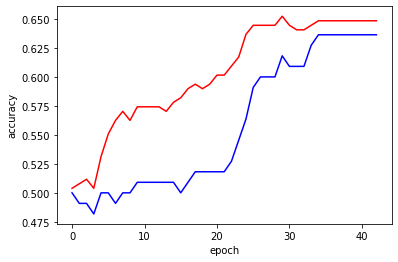

In [36]:
# deep learning classification
n_cols = X_scaled.shape[1]

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='relu'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, 
          y_train, 
          epochs=100, 
          validation_split=0.3,
          callbacks=[EarlyStopping(monitor='val_loss', patience=2)],
          batch_size=32,
          );

# visualize results
plt.plot(model.history.history['acc'], 'r')
plt.plot(model.history.history['val_acc'], 'b')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [37]:
model.evaluate(X_test, y_test)

61/61 [==============================] - 0s 105us/step


[0.7075035962902132, 0.6229508177178805]

In [38]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 32)                384       
_________________________________________________________________
dense_58 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_59 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_60 (Dense)             (None, 2)                 18        
Total params: 1,066
Trainable params: 1,066
Non-trainable params: 0
_________________________________________________________________


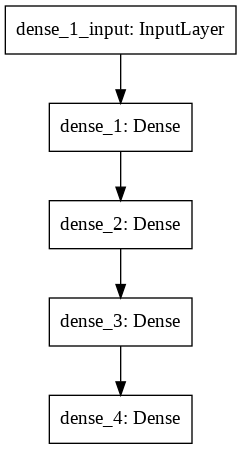

In [0]:
from keras.utils import plot_model
plot_model(model)

In [0]:
# deep learning classification with RandomSearchCV
def create_model(activation='relu', learning_rate=0.01):
  n_cols = X_scaled.shape[1]
  opt = Adam(lr=learning_rate)

  model = Sequential()
  model.add(Dense(50, activation=activation, input_shape=(n_cols,)))
  model.add(Dense(50, activation=activation, input_shape=(n_cols,)))
  model.add(Dense(50, activation=activation, input_shape=(n_cols,)))
  model.add(Dense(2, activation='sigmoid'))
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

  model.fit(X_scaled, 
          y, 
          #epochs=epochs, 
          validation_split=0.3,
          callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
          #batch_size=batch_size,
          )
  return model

Kmodel = KerasClassifier(build_fn=create_model)

# Define the parameters to try out
params = {'activation':['relu', 'tanh'], 'batch_size':[32, 128, 256], 
          'epochs':[50, 100, 200], 'learning_rate':[0.1, 0.01, 0.001]}

random_search = RandomizedSearchCV(Kmodel, param_distributions=params, cv=KFold(3))
random_search.fit(X_scaled, y)

In [0]:
random_search.best_params_

{'activation': 'relu', 'batch_size': 32, 'epochs': 100, 'learning_rate': 0.1}

In [0]:
model.save

# Regression

Predicting 'tip' amount based on the following features: 'total_bill', 'sex', 'smoker', 'day', 'time', 'size'

In [0]:
# # assign dataset to feature and target variables
X = tips_df.drop(['tip'], axis=1)
y = tips_df['tip']
y_reshaped = y.values.reshape(-1,1)

In [0]:
# preprocessing for regression
col_trans = make_column_transformer((OneHotEncoder(), ['sex', 'smoker', 'day', 'time']), remainder ='passthrough')
scaler = StandardScaler()

pipe = make_pipeline(col_trans, scaler)
X_scaled = pipe.fit_transform(X)

In [0]:
# deep learning regression 

n_cols = X_scaled.shape[1]

reg_model = Sequential()
reg_model.add(Dense(500, activation='relu', input_shape=(n_cols,)))
reg_model.add(Dense(300, activation='relu'))
reg_model.add(Dense(300, activation='relu'))
reg_model.add(Dense(1))

reg_model.compile(optimizer='adam', loss='mean_squared_error')
reg_model.fit(X_scaled, y_reshaped, validation_split=0.3, epochs=5)
reg_model.evaluate(X_scaled, y_reshaped)

Train on 170 samples, validate on 74 samples
Epoch 1/5
170/170 [==============================] - 3s 16ms/step - loss: 4.4426 - val_loss: 2.7362
Epoch 2/5
170/170 [==============================] - 0s 175us/step - loss: 2.0269 - val_loss: 0.6680
Epoch 3/5
170/170 [==============================] - 0s 161us/step - loss: 0.6765 - val_loss: 0.8623
Epoch 4/5
170/170 [==============================] - 0s 218us/step - loss: 0.5228 - val_loss: 0.6200
Epoch 5/5
244/244 [==============================] - 0s 66us/step


0.1789891558592437

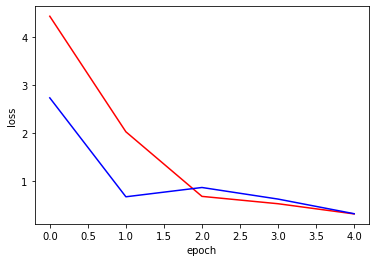

In [0]:
# visualize results
plt.plot(reg_model.history.history['loss'], 'r')
plt.plot(reg_model.history.history['val_loss'], 'b')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [0]:
reg_model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_149 (Dense)            (None, 500)               6000      
_________________________________________________________________
dense_150 (Dense)            (None, 300)               150300    
_________________________________________________________________
dense_151 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_152 (Dense)            (None, 1)                 301       
Total params: 246,901
Trainable params: 246,901
Non-trainable params: 0
_________________________________________________________________
